In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# https://www.yonhapnewstv.co.kr/category/news/politics/feed/

# 뉴스 기사 목록 가져오기

In [3]:
import requests # 화면이 없는 브라우저, 웹사이트 주소를 이용해서 요청 후 응답받는 것 # page 183

In [4]:
rss_url = "https://www.yonhapnewstv.co.kr/category/news/politics/feed/"
yna_news = requests.get(rss_url)

In [5]:
# yna_news.text

In [6]:
from bs4 import BeautifulSoup

In [7]:
yna_news_soup = BeautifulSoup(yna_news.content, "xml") #page 171

In [8]:
link_list = yna_news_soup.select("item > link")

In [9]:
len(link_list)

11

In [10]:
link_list[0]

<link>https://www.yonhapnewstv.co.kr/news/MYH20240529013000641</link>

In [11]:
import konlpy # pip install konlpy # page 257
# http://jdk.java.net/13/ 에서 JDK 다운로드 후 설치, JAVA_HOME 환경변수 설정해야 함

In [12]:
from konlpy.tag import Kkma
kkma = Kkma() # page 270

In [13]:
news = [] # 뉴스 기사의 명사들만 저장할 리스트
for link in link_list:
    news_url = link.text # 태그에서 텍스트만 가져옴
    news_response = requests.get(news_url)
    news_soup = BeautifulSoup(news_response.content, "html.parser")
    news_content = news_soup.select_one(".cont-item01 > .detail")
#     print(news_content.text)
    news_nouns = kkma.nouns(news_content.text)
#     print(news_nouns)
    # 필터링
    news_nouns_filter = filter(lambda word : len(word)>1 , news_nouns)
    news.append(list(news_nouns_filter))

In [14]:
from itertools import chain
text = ' '.join(list(chain(*news)))

In [15]:
L1 = [["1","2","3"], ["3","4","5"]]

In [16]:
list(chain(*L1))

['1', '2', '3', '3', '4', '5']

In [17]:
"-".join(list(chain(*L1)))

'1-2-3-3-4-5'

In [18]:
import wordcloud as wc
stop_w = set(["연합뉴스", "연합", "기사문의", "문의", "앵커", "기자", "기사문의", 
              "뉴스", "제보", "닫기", "기사", "보도", "라인", "오늘", "시간", "준비"])

from PIL import Image
import numpy as np
img = Image.open("south_korea_4x.png").convert("RGBA")
mask_ar = np.array(img)
# mask = Image.new("RGB", img.size, (255,255,255))
# mask.paste(img, img)
# mask_ar = np.array(mask)

In [19]:
wordc = wc.WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", 
                     stopwords=stop_w,
                     max_words=1000,
                     mask=mask_ar, 
                     background_color="white")#, relative_scaling=0.1)
wordc.generate(text)

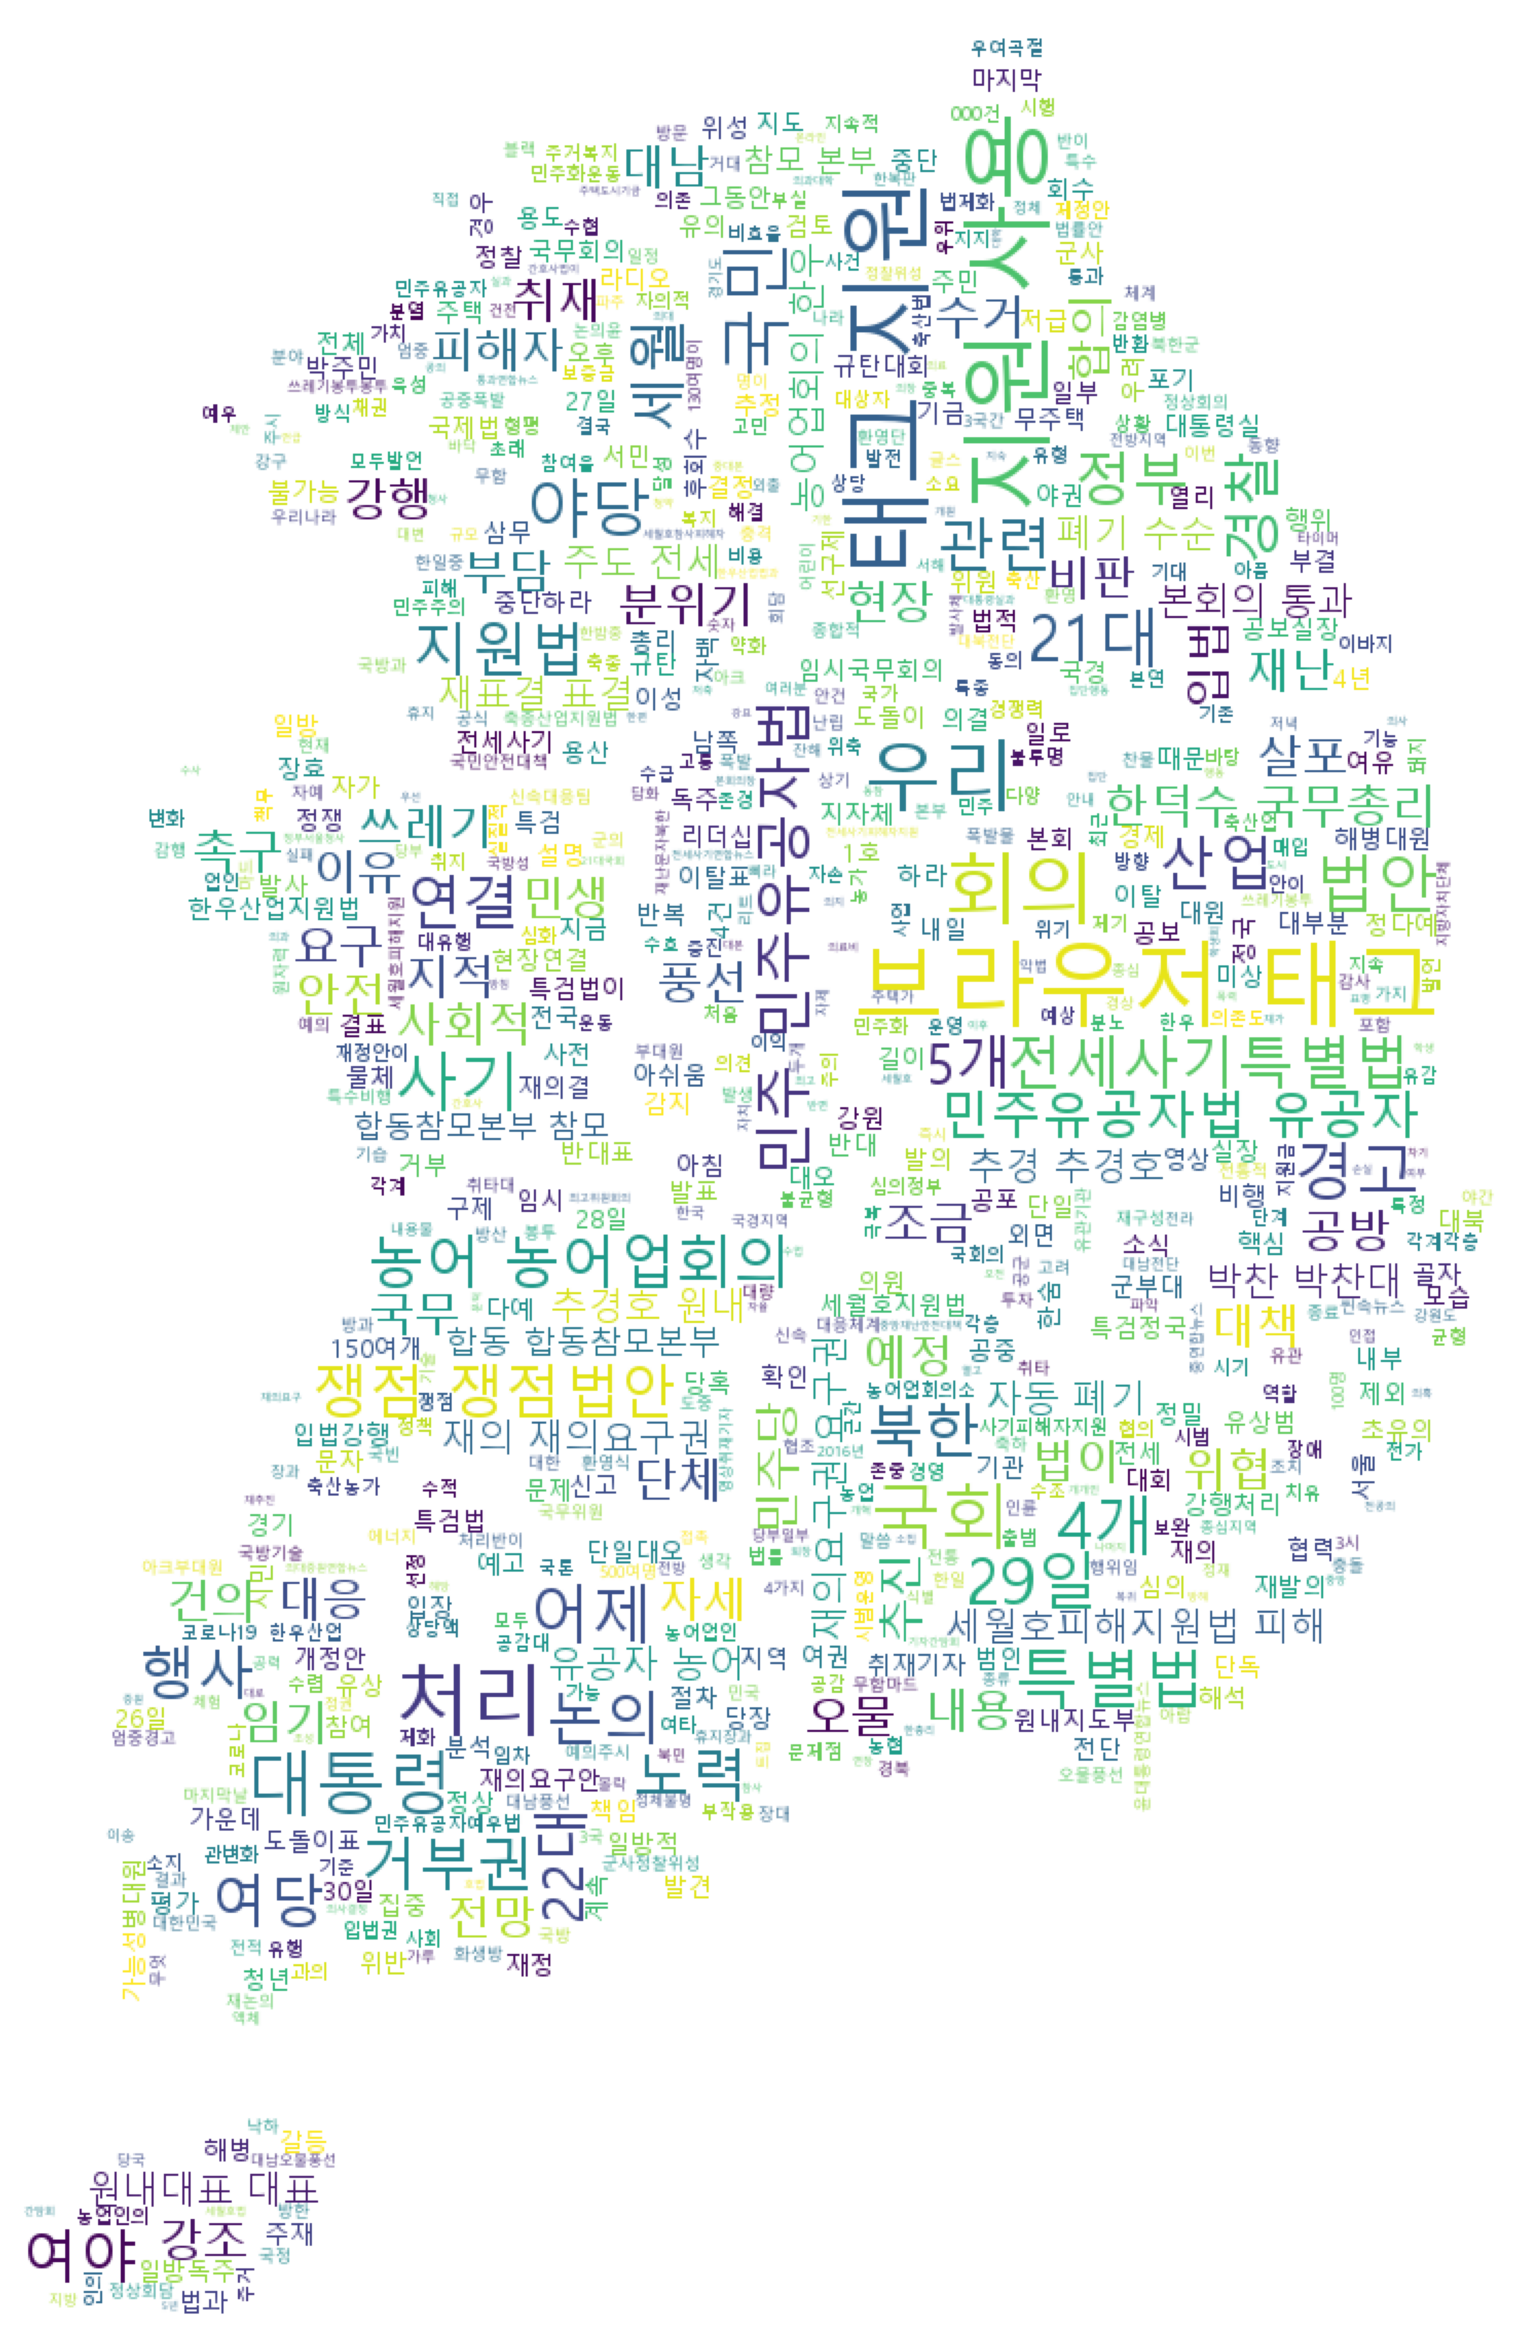

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
plt.imshow(wordc)
plt.axis('off')
plt.show()